\newpage

# Questions: 


**Dataset**:

The dataset for this assignment is the Wine Quality Database, which includes 12 input attributes to predict the wine quality. Your objective is to build classifiers that accurately predict the wine quality category based on these attributes.

- Dataset Link: [https://archive.ics.uci.edu/dataset/186/wine%2Bquality](https://archive.ics.uci.edu/dataset/186/wine%2Bquality).


1) How many observations (rows) and features (variables) are present in the dataset?

In [140]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score 

from ucimlrepo import fetch_ucirepo 

In [142]:
# fetch dataset 
wine_q = fetch_ucirepo(id=186) 
wine_q.data.original

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [143]:
#1) 
all = wine_q.data.original
all.shape

(6497, 13)

In [144]:
all.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


There are 6497 observations and 13 features present in the dataset.

\newpage

2) What types of attributes are included in the dataset? Identify which attributes are numerical, categorical, or of other types.


In [145]:
#2) 
var_inf = wine_q.variables
print(var_inf)

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

Based on the table and the data dictionary, all wine variables are numerical except colour. The response variable is a non-negative numerical variable, as it could be rated as 0 or above. The colour variable is considered categorical.

\newpage

3) Which variable serves as the response (target) if our goal is to build a classifier to predict the wine quality?

Our response variable (or target) is quality. It is an integer from 0 to 10.

\newpage

4) Are there any missing values in the dataset? If so, describe how you would handle them.

In [146]:
#4) 

# Prepocessing
print(var_inf["missing_values"].unique())

['no']


There are no missing values in any variables.

\newpage

5) Display five rows from the original dataset, which includes both predictors and the response variable.

\color{blue}

Hint: You can access the predictors and response by using data.original in the fetched dataset.

\color{black}

In [147]:
#5)
all = wine_q.data.original

In [148]:
all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


\newpage

6) Is any transformation necessary for the response variable? Apply the transformation if needed. Additionally, how balanced is the dataset in terms of the response variable?


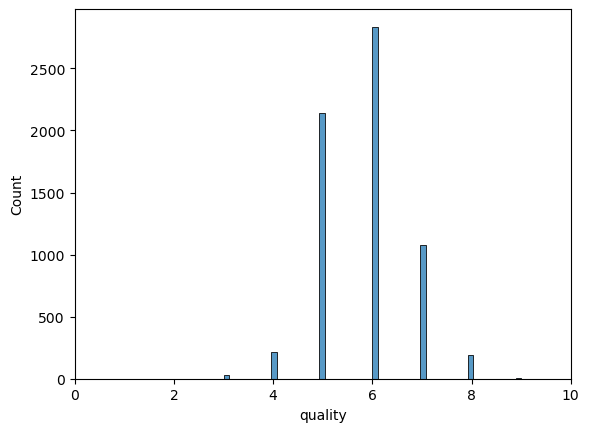

In [149]:
#6)
sns.histplot(
    data=all,
    x='quality'
)

plt.xlim(0, 10)
plt.show()

The data is already bell-shaped, so normally distributed. No transformations are needed.

There are a lot of people who rated the quality of their wine in the mid-range, 5 or 6. Most people rank the wine 6/10. The second highest rating in 5/10. Very few people rated the wine as bad. No one rated the wine as a 1 or 2 out of 10, or a 10/10.

\newpage

7) Remove observations with quality scores of 3, 4, 8, and 9 from the `original` dataset. Use this **filtered data** to complete questions **8 through 19**.

\color{blue}

Hint: Use `isin([3, 4, 8, 9])` to identify the observations to drop.

\color{black}

In [150]:
# Remove observations with quality scores of 3, 4, 8, and 9
filtered_data = all[~all['quality'].isin([3, 4, 8, 9])]
filtered_data.shape
filtered_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


\newpage

8) After filtering, how many unique quality scores remain in the dataset?


In [151]:
filtered_data['quality'].nunique()

3

After filtering, there are 3 unique quality scores remaining in the dataset. Only quality scores of 5, 6, and 7 appear in the dataset now.

\newpage

9) Are there any potential outliers in the filtered dataset? Describe the method(s) you would use to identify them.

Note: You do not need to handle the outliers, only describe how to detect them.


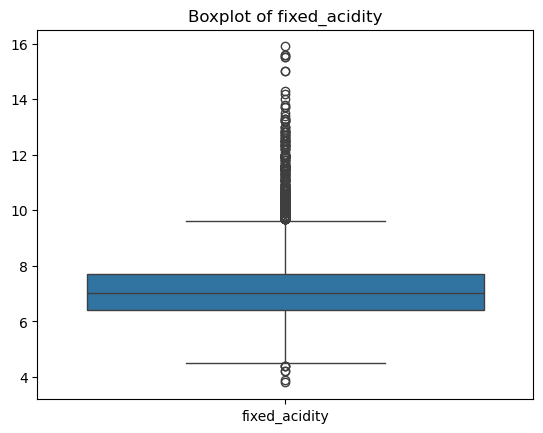

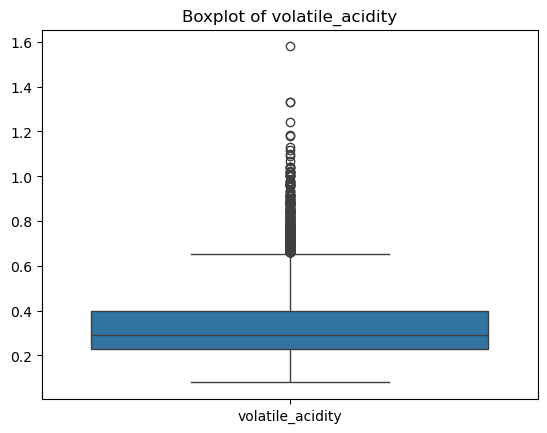

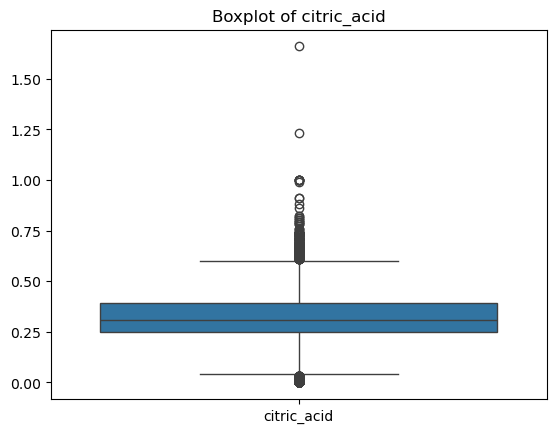

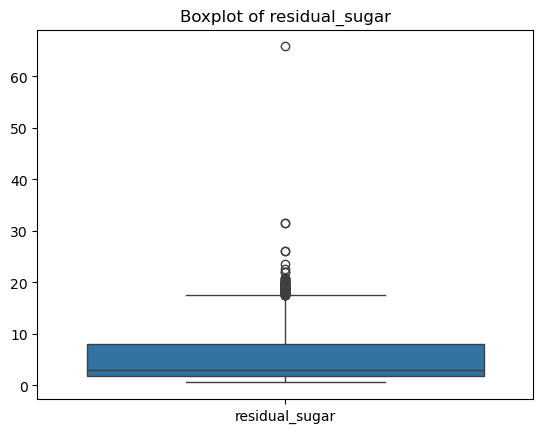

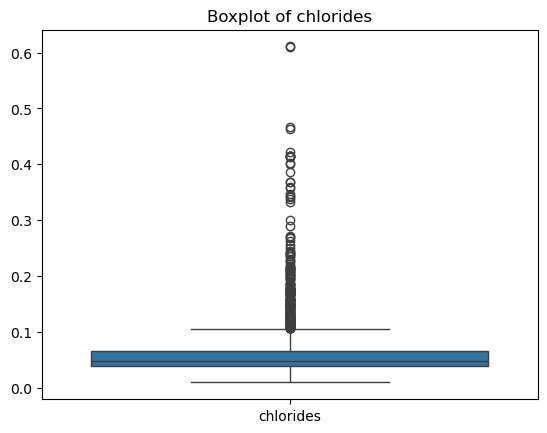

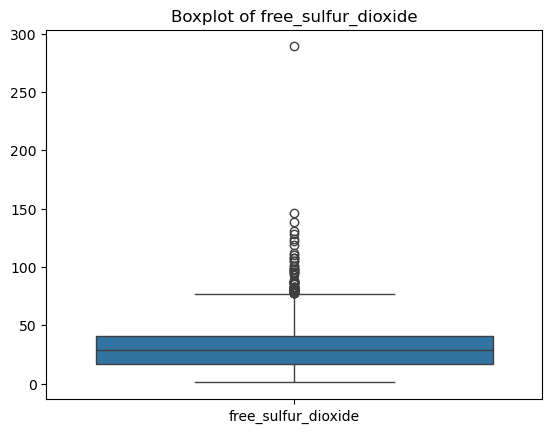

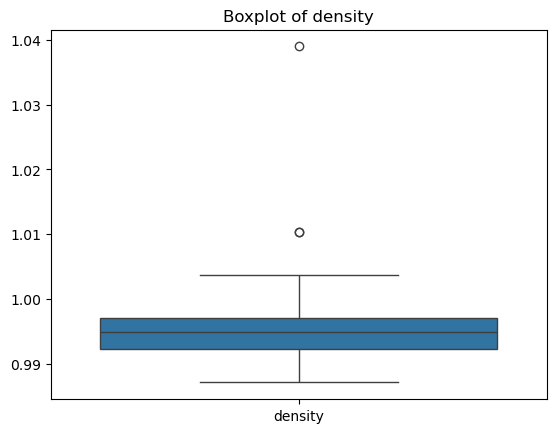

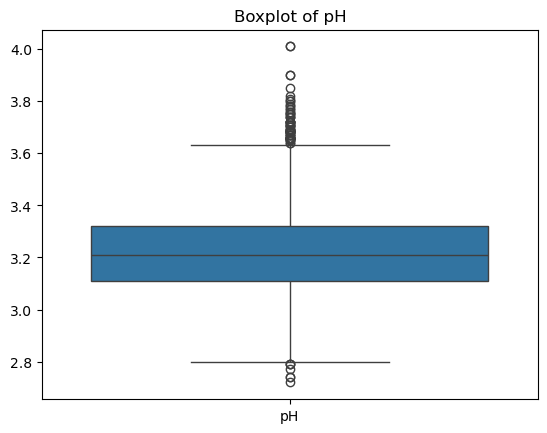

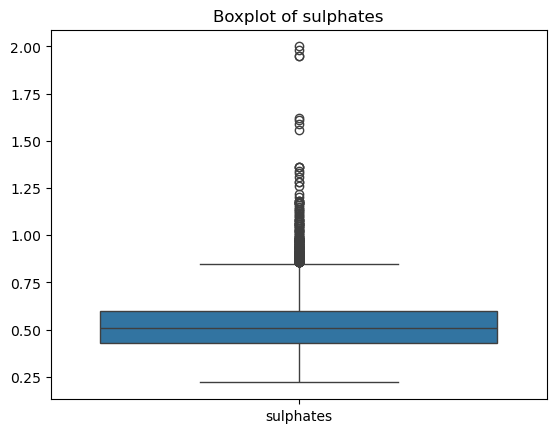

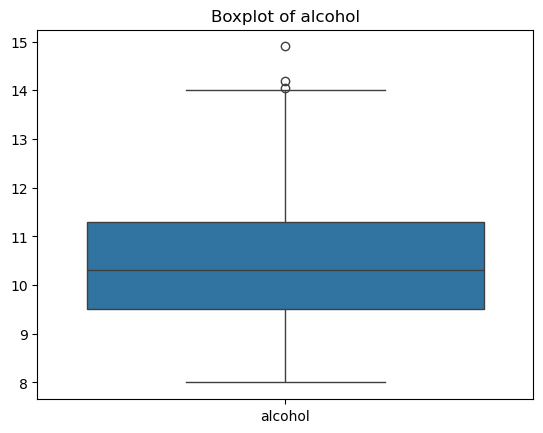

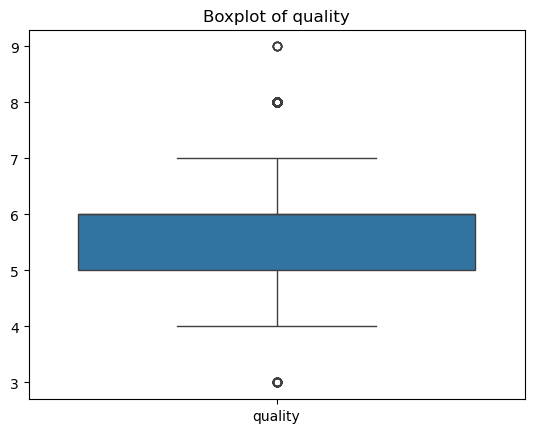

In [152]:
# Check the distribution of features for any outliers
# We can use a boxplot to detect outliers:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates',
            'alcohol', 'quality']
for feature in features:
    plt.figure()
    sns.boxplot(data=all[[feature]])
    plt.title(f'Boxplot of {feature}')
    plt.show()

Almost all features contain outliers, but we will retain them in the analysis as they may be important for predicting wine quality. However, if the model's performance deteriorates, we can consider capping the outliers to improve results.

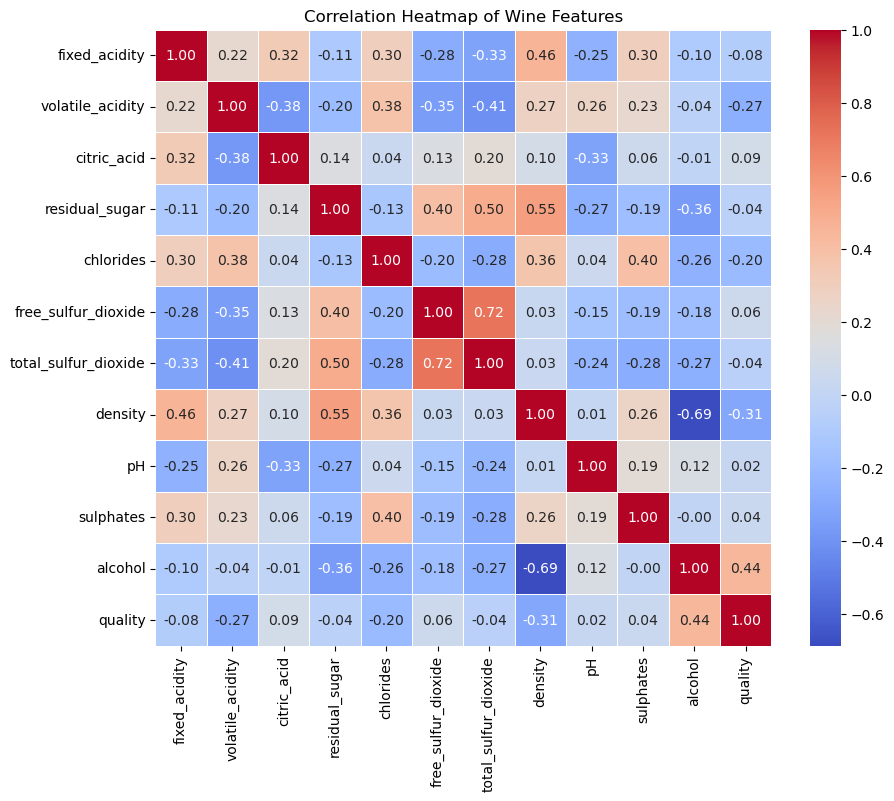

In [153]:
numerical_vars = all.select_dtypes(include=[np.number])
scaler = StandardScaler()
numerical_vars_scaled = pd.DataFrame(scaler.fit_transform(numerical_vars),
                                     columns=numerical_vars.columns)
corr_matrix = numerical_vars_scaled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=.5)

plt.title('Correlation Heatmap of Wine Features')
plt.show()

Alcohol seems negatively correlated with density, and Free Sulfur Dioxide is positively correlated with Total Sulfur Dioxide.

\newpage

10) Separate the predictors and the response variable from the filtered dataset.

In [154]:
# Separate predictors and response variable
X = filtered_data.drop(columns=['quality'])
y = filtered_data['quality']

In [155]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red


In [156]:
# make sure the variable types are correctly read in
print(X.dtypes)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
color                    object
dtype: object


In [157]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [158]:
print(y.dtypes)

int64


\newpage

11) Are any data transformations necessary for the features before training a classification tree model? If so, explain the rationale and apply the transformation.


Classification trees make decisions based on threshold splits of individual features, not on distances or magnitudes. So, standardization of features is not necessary for classification trees.

\newpage

12) Split the dataset (filtered in Part (10) and transformed in Part (11)) into training (80%) and testing (20%) subsets.

In [159]:
# Split the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2,
                                                    random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4842, 12)
X_test shape: (1211, 12)
y_train shape: (4842,)
y_test shape: (1211,)


\newpage

13) Train a classification tree model using the training data and perform model selection through cross-validation (e.g., tuning tree depth). After identifying the best model based on validation performance, evaluate its final performance on the test data.

\color{blue}

Hint: Use the Gini index to grow the tree and classification accuracy for model selection.

\color{black}

In [160]:
depth_range = range(1, 20)
cv_scores = []
for k in depth_range:
    dt = DecisionTreeClassifier(
        criterion='gini', # growing tree based on gini index
        random_state=0, 
        max_depth=k
        )
    
    # 5-fold cross-validation using accuracy 
    cv_scores_k = cross_val_score(
        dt,
        X_train,
        y_train,
        cv=5,
        # accuracy for classification on the hold-out folds
        scoring='accuracy'  
    )
    
    # append the average accuracy across all folds
    cv_scores.append(np.mean(cv_scores_k))

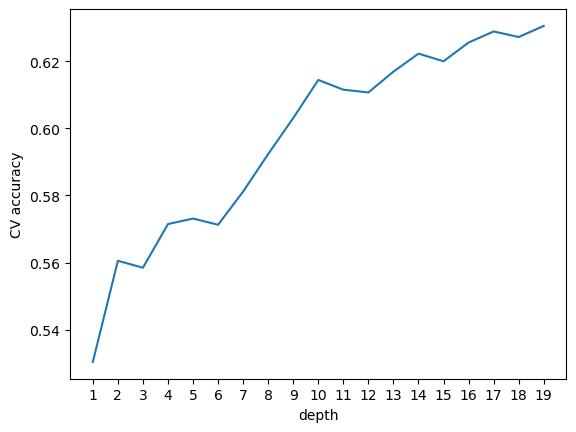

In [161]:
plt.plot(depth_range, cv_scores)
plt.xlabel('depth')
plt.ylabel('CV accuracy')
plt.xticks(range(1,20))
plt.show()

In [162]:
# Find the best depth
best_depth = depth_range[np.argmax(cv_scores)]
print(f"The best depth is: {best_depth}")

# Train the best classification tree model
best_dt = DecisionTreeClassifier(
    criterion='gini', 
    random_state=0, 
    max_depth=best_depth
)
best_dt.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_dt.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Test accuracy of the best classification tree: {accuracy}")

The best depth is: 19
Test accuracy of the best classification tree: 0.6614368290668868


In [163]:
# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy}")
# (Using Github Copilot)

Test set accuracy: 0.6614368290668868


In [164]:
# find the test set accuarcy
dt_best = DecisionTreeClassifier(
    max_depth = 19, 
    random_state=0
    ) 
dt_best.fit(X_train, y_train)
test_accuracy = dt_best.score(X_test, y_test)
print(round(test_accuracy,2))

0.66


\newpage

14) Using the best classification tree model, identify the two most important features for predicting wine quality.


In [165]:
# (GitHub Copilot):
# Get feature importances from the best classification tree model
importances = best_dt.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 2 most important features
top_2_features = feature_importances.head(2)
print(top_2_features)

             Feature  Importance
10           alcohol    0.156411
1   volatile_acidity    0.105032


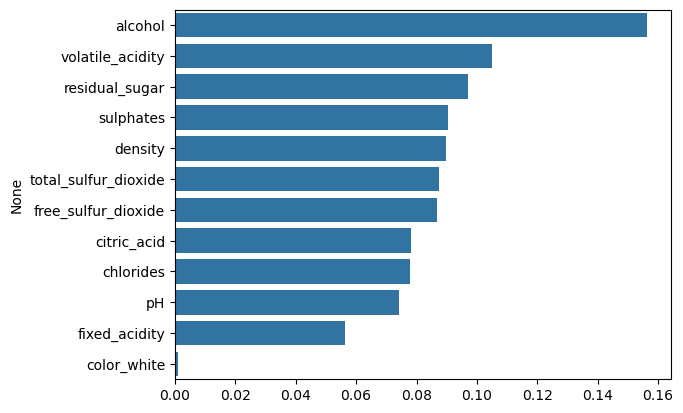

In [166]:
fea_imp = dt_best.feature_importances_
sorted_indices = fea_imp.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

So the two most important features for predicting wine quality are Alcohol and Volatile Acidity. These features play a crucial role in distinguishing between wine quality, likely due to their significant variation across different wine brands. In contrast, white wine was found to be the least significant feature, suggesting that it does not contribute much to differentiating the quality of wine rating.

\newpage

15) Write at least one statement summarizing the classification tree model's performance and its implications in the context of the dataset and the problem.

The model's moderate performance suggests that chemical components could potentially classify wine ratings. However, if performance were to degrade in different datasets or conditions, further refinement such as outlier capping or feature engineering may need to be considered. Additionally, more complex models like Random Forests could be used to get a higher predictive accuracy.

\newpage

16) Create copies of `X_train` and `X_test` from Part (12) and save them as `X_train2` and `X_test2`.


In [167]:
# Create copies of X_train and X_test
X_train2 = X_train.copy()
X_test2 = X_test.copy()

\newpage

17) Is any additional data transformation necessary for features before training a KNN classifier model? If so, write the rationale for the transformation and then apply the transformation to the features in `X_train2` and `X_test2`.

\color{blue}

Hint: Explain why feature scaling may or may not be necessary for KNN and how it could affect model performance.

\color{black}

A transformation is necessary to standardize the features, as they have different value ranges. Otherwise, features with larger scales will dominate, and
this will result in bias results. Scaling features can also lead to better performance since we have a high-dimension dataset.

In [168]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Convert the scaled data back to DataFrame for consistency
X_train2_scaled = pd.DataFrame(X_train2_scaled, columns=X_train2.columns)
X_test2_scaled = pd.DataFrame(X_test2_scaled, columns=X_test2.columns)

# Display the first few rows of the scaled training data
X_train2_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_white
0,-0.874060,0.032119,-0.550887,2.683950,-0.175278,0.128362,1.196877,1.572985,-0.601030,0.535527,-0.996440,0.56797
1,0.074952,-0.841942,0.844960,-0.858746,-0.318465,-0.572018,-0.331236,-0.784683,-0.413058,-0.484170,-0.395723,0.56797
2,0.074952,0.219418,-1.109226,1.962871,-0.232553,1.645851,2.191928,1.435482,-0.538373,-0.552150,-1.339707,0.56797
3,0.154036,-0.280046,1.124130,1.523952,-0.547563,1.791763,1.161340,1.120232,-1.227605,-1.299928,-1.425523,0.56797
4,0.470374,-0.467344,2.938731,0.416207,-0.347102,1.645851,0.770427,0.422658,0.025544,0.739466,-0.395723,0.56797


\newpage

18) Using the training data (`X_train2`, `y_train`), train a K-Nearest Neighbors (KNN) classifier and perform model selection through cross-validation (e.g., tuning the neighborhood size). After selecting the best model based on validation performance, evaluate its final performance on the test data (`X_test2`, `y_test`).

\color{blue}

Note:

1) If any transformations were applied to `X_train2` and `X_test2` in Part 17, ensure those transformed datasets are used here. 
 
2) Begin tuning the neighborhood size for cross-validation starting from 2.

\color{black}


In [169]:
# Initialize variables
k_range = range(2, 21)
cv_scores = []

# Perform cross-validation to find the best k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train2_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best k
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"The best number of neighbors is: {best_k}")

# Train the best KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train2_scaled, y_train)

# Evaluate the model on the test data
y_pred_knn = best_knn.predict(X_test2_scaled)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Test accuracy of the best KNN classifier: {test_accuracy_knn}")

The best number of neighbors is: 2
Test accuracy of the best KNN classifier: 0.64822460776218


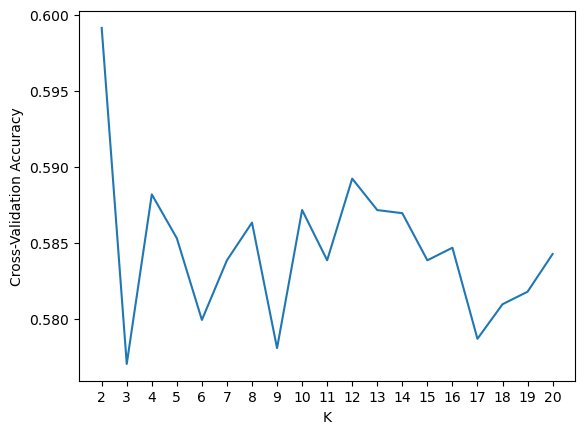

In [170]:
k_range = range(2, 21)  # Ensure k_range matches the length of cv_scores
plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(range(2, 21))
plt.show()

We should use k = 2 because it has the highest cross-validation accuracy.

\newpage

19) Write at least one statement summarizing the KNN classifier model's performance and its implications in the context of the dataset and the problem.

The KNN classifier model performed slightly worse than the cross validation method, but not by much. It performs moderately well in predicting wine quality based on the features given. This suggests that the KNN model can capture some of the underlying patterns in the data, but there is room for improvement. The moderate performance implies that while KNN is useful, more sophisticated models or additional feature engineering might be required to achieve higher accuracy in classifying wine quality.

\newpage

20) Write at least two statements that compare and contrast classification and KNN classifers performance and interpretation of the model on the test set. 

The Classification Tree achieved a test accuracy of about 66.14%, 
while K-Nearest Neighbors (KNN) had a slightly lower
test accuracy of around 64.82%. 
This indicates that the Classification Tree model performed slightly
 better in predicting wine quality given the provided features.

The Classification Tree provides clear insights into feature importance and decision rules, 
making it easier to understand which features contribute most
 to the predictions, whereas the KNN classifier is more intuitive in
  terms of its mechanism (classifying based on the nearest neighbors), but it does not offer
   direct interpretability regarding feature importance or decision paths.

\newpage

## References

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.